#DIABETES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

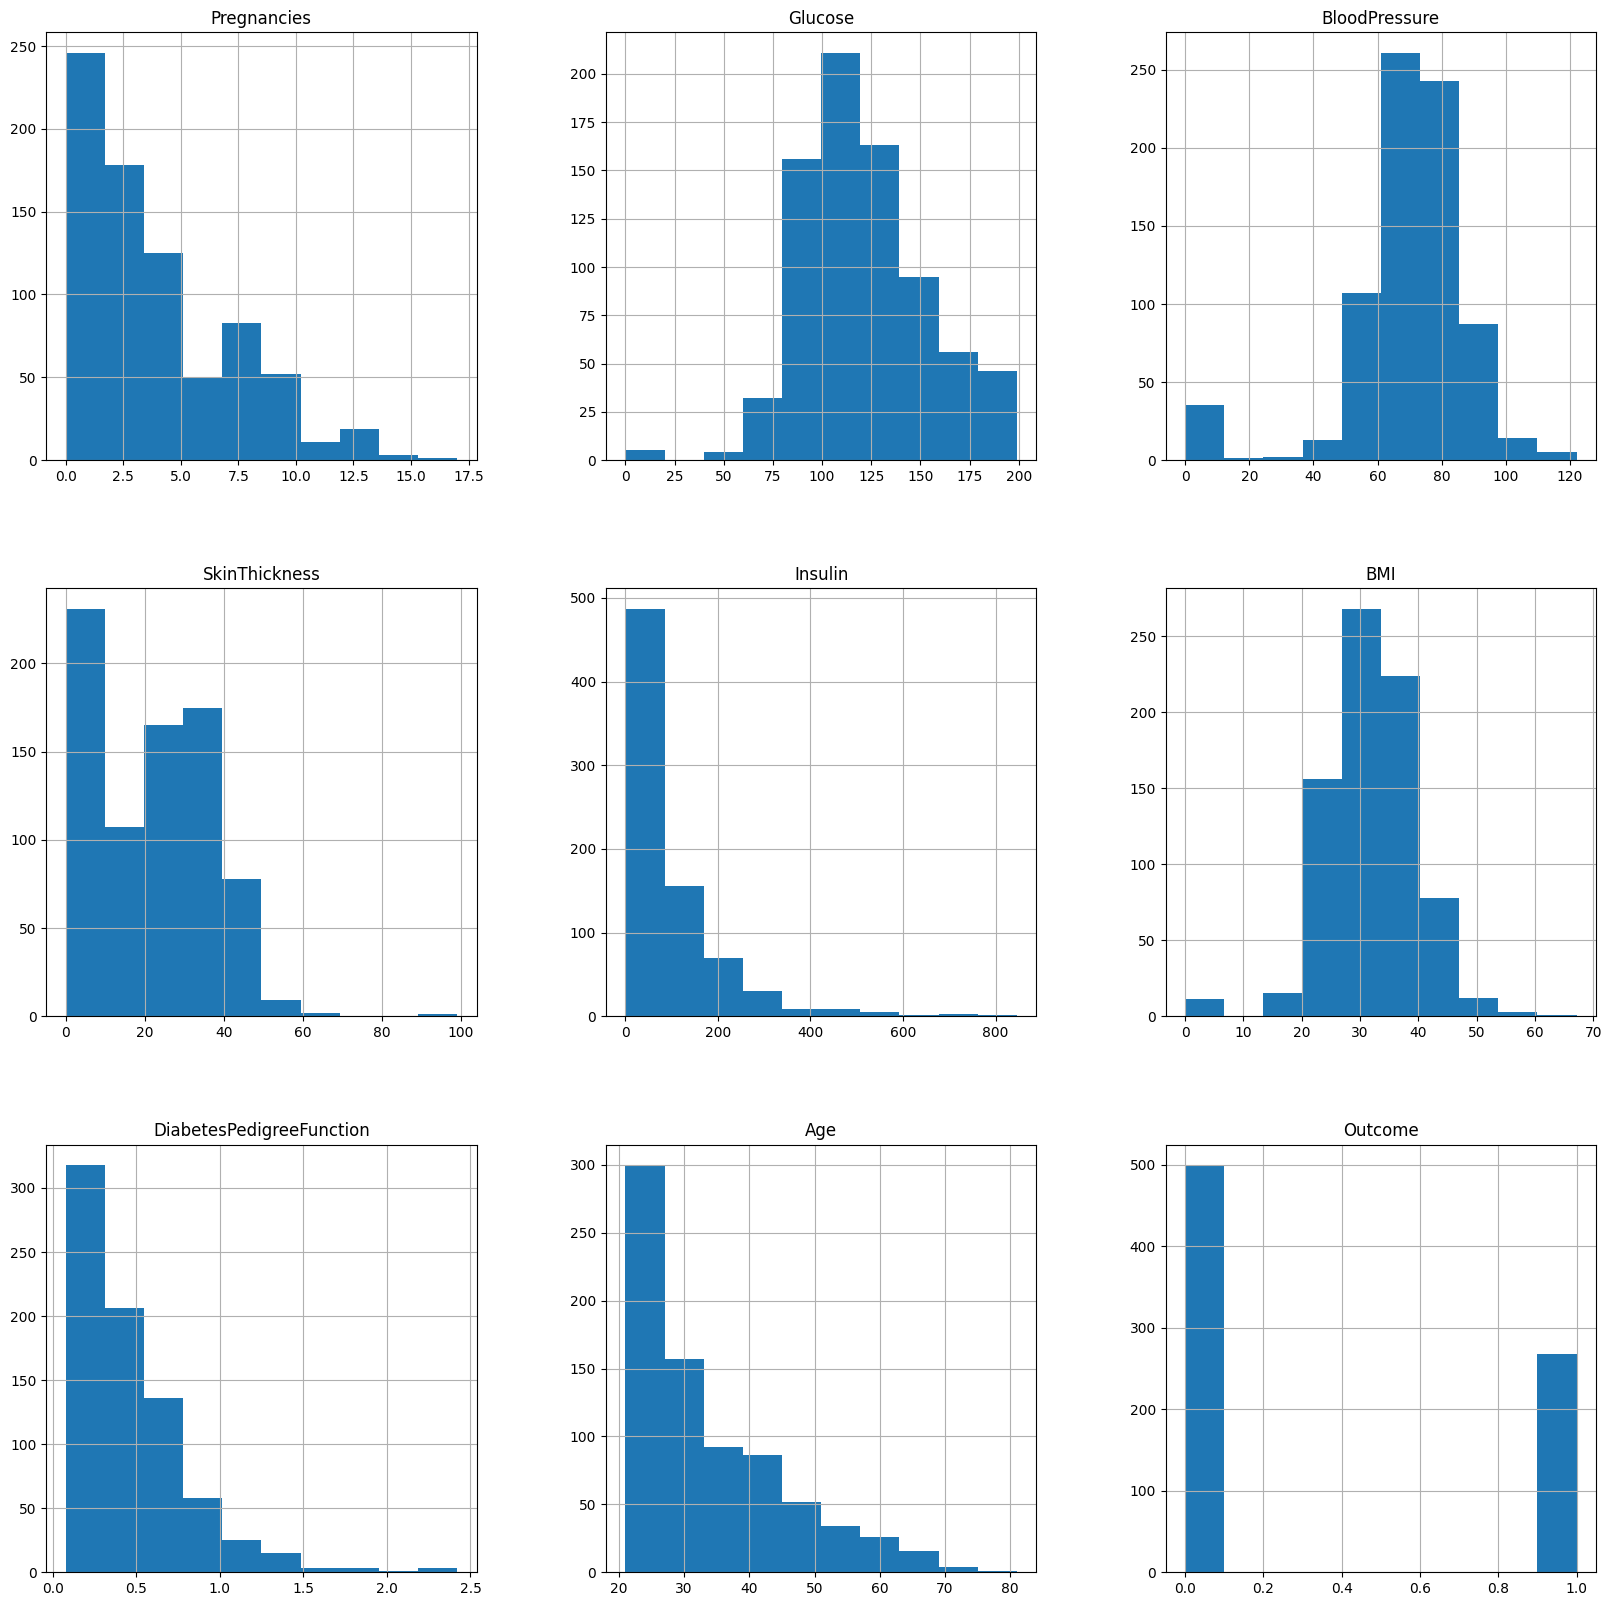

In [ ]:
df.hist(figsize = (20,20))

This command can be useful for quickly visualizing the distribution of each numeric feature in the dataset. For example, it can help identify any features that have a large number of values in a particular range or features that have many missing values. Additionally, it can be useful for identifying potential outliers or skewness in the distribution of a feature, which can be important considerations when building a predictive model.

In [ ]:
df_copy=df

<Axes: >

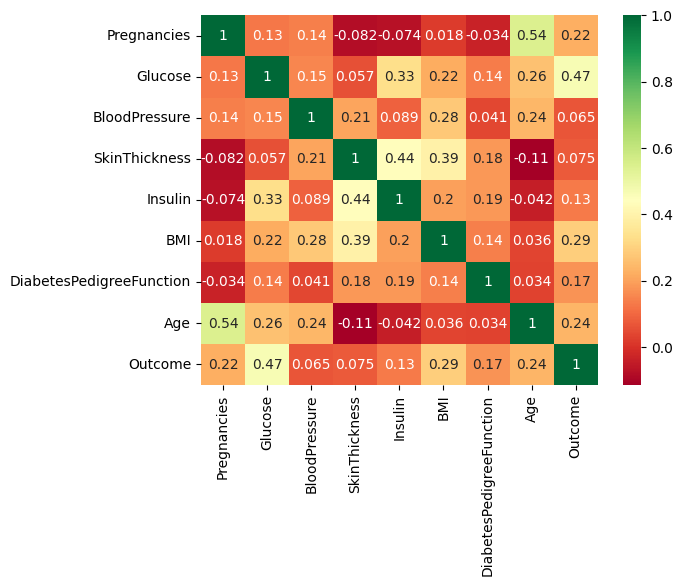

In [ ]:
sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

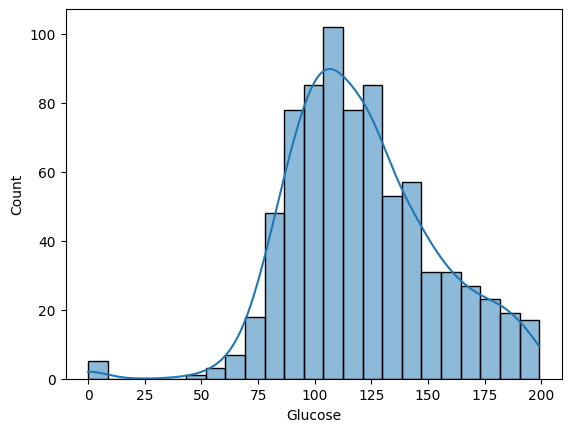

In [ ]:
sns.histplot(data=df, x="Glucose", kde=True)
plt.show()

The histogram can give insights into the range of glucose values in the dataset and the number of observations in each range. The kernel density estimation plot can provide additional information about the shape of the distribution of the feature, indicating whether it is normally distributed or skewed, which can be an important consideration when selecting appropriate statistical methods for data analysis.

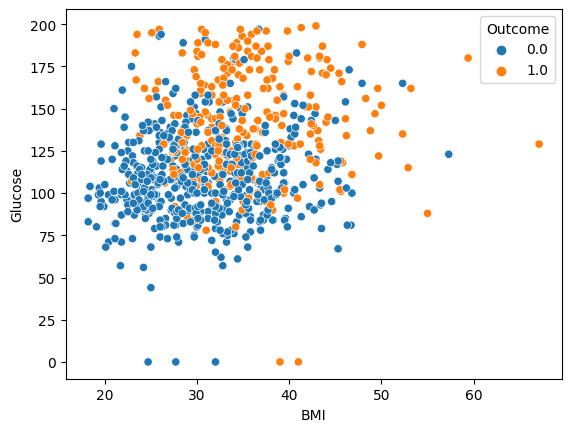

In [ ]:
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Outcome")
plt.show()

The scatter plot can show any patterns or trends in the data, such as a positive or negative correlation between the two features, as well as how these patterns relate to the target variable.

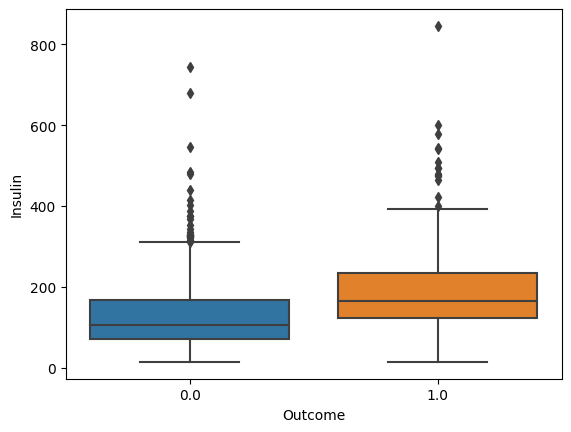

In [ ]:
sns.boxplot(data=df, x="Outcome", y="Insulin")
plt.show()

The box in the boxplot represents the interquartile range (IQR) of the data, with the lower and upper hinges representing the first and third quartiles, respectively. The horizontal line inside the box represents the median insulin level, while the whiskers extending from the box represent the range of the data, excluding outliers.
The plot shows that the median insulin level is higher for diabetic patients (Outcome = 1) compared to non-diabetic patients (Outcome = 0). There are also some outliers for both classes, with diabetic patients having more extreme values. Overall, this suggests that insulin levels may be a useful feature for predicting diabetes in this dataset.

In [ ]:
df["Insulin"] = df["Insulin"].replace(0, np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.nan)
df["BMI"] = df["BMI"].replace(0, np.nan)

In [ ]:
from sklearn.impute import KNNImputer
# Create a copy of the dataset to impute missing values
dfc = df.copy()

# Fit and transform the KNN imputer on the entire dataset
imputer = KNNImputer(n_neighbors=3)
dfc.iloc[:, :] = imputer.fit_transform(dfc)

In [ ]:
dfc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.0,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [ ]:
df=dfc

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.0,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.drop(['Outcome'], axis= 1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=80)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_curve, 
    roc_auc_score
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing a Random Forest Classifier
c = RandomForestClassifier(n_estimators=300, random_state=10)

# Fitting the classifier to the training data
c.fit(X_train, y_train)

# Using the classifier to make predictions on the testing data
pred = c.predict(X_test)

To display the confusion matrix

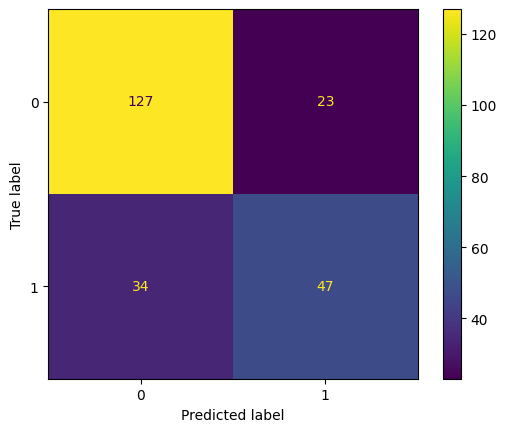

In [ ]:
labels = [0,1]
confusion_matrix_rf= confusion_matrix(y_test,pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=labels)
disp.plot();

Accuracy

In [ ]:
accuracy_score_rf= accuracy_score(y_test,pred)
accuracy_score_rf

0.7532467532467533

F1 score

In [ ]:
f1_rf= f1_score(pred, y_test, average="weighted")
f1_rf

0.7578706508882612

ROC Curve and Area under the ROC curve

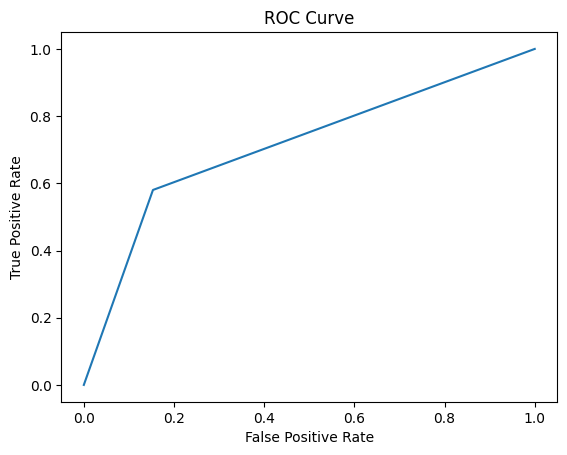

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred)

#create ROC curve
plt.plot(fpr_rf,tpr_rf)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
score_rf= roc_auc_score(y_test, pred)
score_rf

0.7134567901234568

In [ ]:
def DIABETES(c):
  ip1=float(input("Enter Number of pregnancies: "))
  ip2=float(input("Enter Glucose: "))
  ip3=float(input("Enter Blood Pressure: "))
  ip4=float(input("Enter Skin Thickness: "))
  ip5=float(input("Enter Insulin Levels: "))
  ip6=float(input("Enter BMI: "))
  ip7=float(input("Enter DiabetesPedigreeFunction: "))
  ip8=float(input("Enter Age: "))

  output=c.predict([[ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8]])
  if output[0]==0:
    print("Patient is not at risk of diabetes.")
  else:
    print("Patient is at risk of diabetes. Take Care!")

In [ ]:
DIABETES(c)